In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import json
import geopandas as gpd
from copy import deepcopy
import shapely
from shapely.geometry import Point,Polygon,LineString
import pyproj

### map of the 50 metro areas

In [2]:
# shape file for US metro areas
metromap = gpd.read_file("/mnt/data/spatial_twitter_shared_data/top50metro_shapes/shapes/tl_2019_us_cbsa/tl_2019_us_cbsa.shp")

In [3]:
# manipulations
metromap.set_geometry("geometry",inplace=True)

metromap["GEOID"] = metromap["GEOID"].astype(int)

In [4]:
# cbsa info table
cbsa_info = pd.read_csv("/mnt/data/spatial_twitter_shared_data/top50metro_shapes/cbsacode_shortname_tracts.csv", sep=";", index_col=0)

In [5]:
# manipulations
cbsa_info = cbsa_info.loc[:,["cbsacode", "short_name"]].drop_duplicates()
cbsa_info["selected"] = 1

In [6]:
cbsa_info["selected2"] = cbsa_info["short_name"].map(lambda n: "Boston" in n or "Nash" in n or "San Francisco" in n or "Atlanta" in n).map(int)

In [7]:
cbsa_info["color"] = cbsa_info["selected2"].map(lambda s: "#00441B" if s==1 else "grey")

In [8]:
# merge for plot
metromap = pd.merge(metromap, cbsa_info, left_on="GEOID", right_on="cbsacode", how="left")

In [9]:
# correction on the final dataframe
metromap["selected2"] = metromap["selected2"].fillna(0)
metromap["color"] = metromap["color"].fillna("white")

In [10]:
# shape file for US states
usmap = gpd.read_file("/mnt/data/spatial_twitter_shared_data/top50metro_shapes/shapes/tl_2017_us_state/tl_2017_us_state.shp")

# manipulations
usmap.set_geometry("geometry",inplace=True)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:471: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


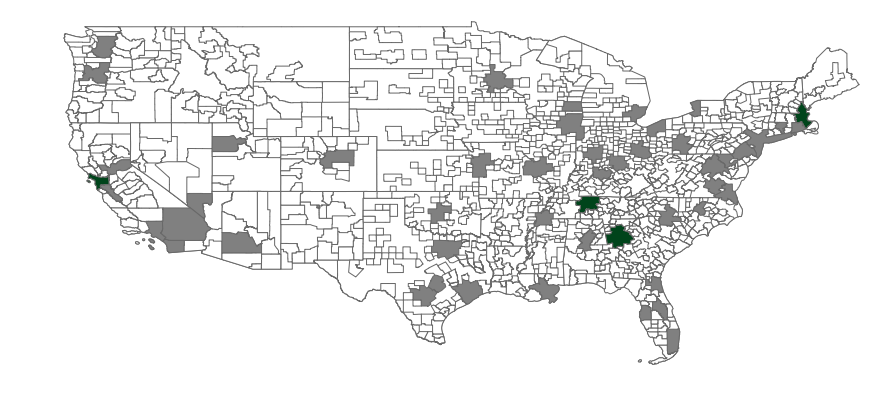

In [20]:
### combination

# general
import matplotlib.patches as mpatches
plt.rcParams['font.size']=16
plt.rc('legend',fontsize=22)

fig, ax = plt.subplots(1,1,figsize=(15,15))


# MAP
usmap.plot(ax=ax, color="white", edgecolor='dimgray')
metromap.plot(ax=ax, column="selected", color=metromap["color"], edgecolor='dimgray')
ax.set_xlim([-127,-66])
ax.set_ylim([24,50])
ax.axis('off')

# top50metro = mpatches.Patch(color='#00441B', label='Top 50 metro areas')
# allmetro = mpatches.Patch(color='lightgray', label='Metro areas')
# ax.legend(handles=[top50metro, allmetro], loc='lower left')


# plt.show()
plt.savefig('../figures/map_users_top50.png', dpi=300, bbox_inches='tight')